<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="primero"></a>
## 1. Ensamblados para regresión
---
Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.

In [1]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
df

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000
...,...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000,17.217391
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,15.238095
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,14.095238
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.052632


> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.

In [2]:
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
df

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,17.217391,1,2016,12,0,0,0,1
1457,17.217391,68.043478,3.547826,1015.565217,15.238095,2,2016,12,0,0,0,1
1458,15.238095,87.857143,6.000000,1016.904762,14.095238,3,2016,12,0,0,0,1
1459,14.095238,89.666667,6.266667,1017.904762,15.052632,4,2016,12,0,0,0,1


> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [3]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
X_train_complete = X
y_train_complete = y
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only
X_train_complete, y_train_complete = shuffle(X_train_complete, y_train_complete, random_state=0) #shuffle values on train only

> a) Describa el problema trabajado, la cantida de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

Text(0, 0.5, 'Temperatura')

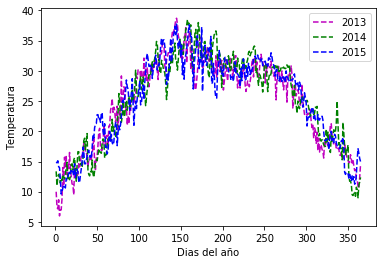

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

t2013 = np.empty(365)
t2014 = np.empty(365)
t2015 = np.empty(365)
t2016 = np.empty(366)
dias = np.arange(1,366)

for index, row in df.iterrows():
    if row['year'] == 2013:
        t2013[index%365] = row['meantemp']
    elif row['year'] == 2014:
        t2014[index%365] = row['meantemp']
    elif row['year'] == 2015:
        t2015[index%365] = row['meantemp']
    elif row['year'] == 2016:
        t2016[index%366] = row['meantemp']


plt.plot(dias,t2013,'--m',label ="2013")
plt.plot(dias,t2014,'--g',label ="2014")
plt.plot(dias,t2015,'--b',label ="2015")
#plt.plot(dias,t2016,'s--g',label ="2016")
plt.legend(loc='best')
plt.xlabel("Dias del año")
plt.ylabel("Temperatura")

Se tienen dos sets de datos, uno para entrenamiento y otro para test. El set de entrenamiento tiene 1462 entradas que corresponde a los dias transcurridos en 4 años (inicio del 2013 a fin del 2016), mientras que el de test tiene solo 114 que corresponden a los dias transcurridos en 4 meses (enero 2017 a mayo 2017).
Se busca estimar la temperatura del dia siguiente según los datos del día actual. El modelo se entrenará con los datos de . Entre los datos se encuentran: la humedad, velocidad del viento, presion atmosferica, el año, el mes, el día y la temporada, que puede ser invierno, verano, otoño o lluviosa. En el grafico se aprecia que todos los años la temperatura tiene un compotamiento similar durante los mismos meses.

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?

In [5]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
    
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
# model_unr.set_params(max_depth=param_d, min_samples_split=param_m) 
model_unr.fit(X_train,y_train)

model_r = Tree()
model_r.set_params(max_depth=50, min_samples_split=20)
model_r.fit(X_train,y_train)

... #define your regularized tree model

Ellipsis

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.

RMSE train=  0.0
RMSE val=  2.4603811712804906


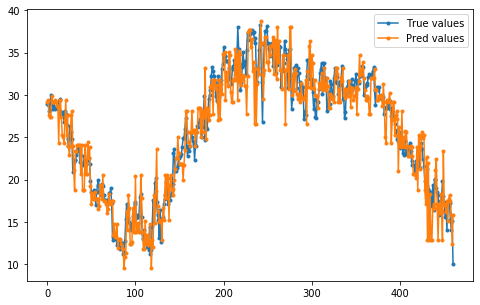

In [6]:
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

RMSE train=  1.183861477354968
RMSE val=  1.980054534825134


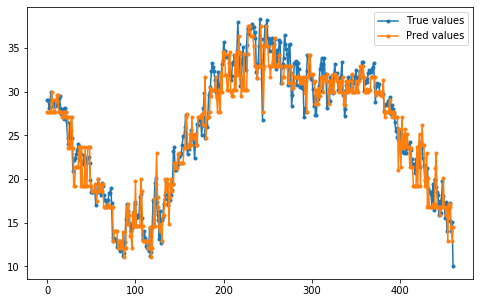

In [7]:
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

En el árbol no regularizado, se observa que el error en el set de entrenamiento es 0. Lo que indica un overfitting, esto se refleja en que tiene un RMSE mas alto. Mientras que en árbol regularizado no se alcanza el RMSE igual a 0 en el entranamiento y el resultado RMSE para la validación es mejor por que podia generalizar mejor el modelo.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

Best n param=  512
RMSE train=  0.6420042428642324
RMSE val=  1.6783782661167586


Text(0.5, 1.0, 'Bagging Arbol No regularizado')

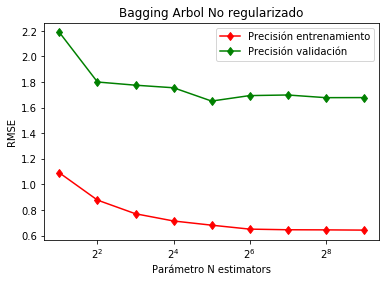

In [8]:
from sklearn.ensemble import BaggingRegressor

bestRMSE = 100
bestParamN = 0
n_range = [2**i for i in range(1,10)]
trains_RMSE = list()
vals_RMSE = list()

for n_r in n_range:
  model = BaggingRegressor(base_estimator=Tree(), n_estimators=n_r, n_jobs=-1)
  model.fit(X_train,y_train)
  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  trainRMSE = RMSE(y_train,y_train_hat)
  valRMSE = RMSE(y_val,y_val_hat)
  if valRMSE < bestRMSE:
    bestParamN = n_r
  trains_RMSE.append(trainRMSE)
  vals_RMSE.append(valRMSE)

print("Best n param= ",bestParamN)
model_bagging_unr = BaggingRegressor(base_estimator=Tree(), n_estimators=bestParamN, n_jobs=-1, oob_score=True)
model_bagging_unr.fit(X_train,y_train)
y_train_hat = model_bagging_unr.predict(X_train)
y_val_hat = model_bagging_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt
plt.plot(n_range, trains_RMSE, 'rd-', label="Precisión entrenamiento")
plt.plot(n_range, vals_RMSE, 'gd-', label="Precisión validación")
plt.legend(loc='best')
plt.xlabel("Parámetro N estimators")
plt.ylabel("RMSE")
plt.xscale('log',basex=2)
plt.title("Bagging Arbol No regularizado")

Best n param=  512
RMSE train=  0.6412900245347942
RMSE val=  1.6768334663314106


Text(0.5, 1.0, 'Bagging Arbol regularizado')

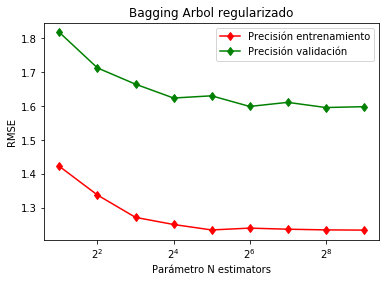

In [9]:
from sklearn.ensemble import BaggingRegressor

bestRMSE = 100
bestParamN = 0
n_range = [2**i for i in range(1,10)]
trains_RMSE = list()
vals_RMSE = list()

for n_r in n_range:
  model = BaggingRegressor(base_estimator=Tree(max_depth=50, min_samples_split=20), n_estimators=n_r, n_jobs=-1)
  model.fit(X_train,y_train)
  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  trainRMSE = RMSE(y_train,y_train_hat)
  valRMSE = RMSE(y_val,y_val_hat)
  if valRMSE < bestRMSE:
    bestParamN = n_r
  trains_RMSE.append(trainRMSE)
  vals_RMSE.append(valRMSE)

print("Best n param= ",bestParamN)
model_bagging_reg = BaggingRegressor(base_estimator=Tree(), n_estimators=bestParamN, n_jobs=-1, oob_score=True)
model_bagging_reg.fit(X_train,y_train)
y_train_hat = model_bagging_reg.predict(X_train)
y_val_hat = model_bagging_reg.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt
plt.plot(n_range, trains_RMSE, 'rd-', label="Precisión entrenamiento")
plt.plot(n_range, vals_RMSE, 'gd-', label="Precisión validación")
plt.legend(loc='best')
plt.xlabel("Parámetro N estimators")
plt.ylabel("RMSE")
plt.xscale('log',basex=2)
plt.title("Bagging Arbol regularizado")

Utilizando Bagging en un árbol de múltiples niveles no regularizado, se obtiene un modelo con poco overfitting. El error obtenido para el conjunto de entrenamiento es 0.6395, el cual es mayor que los casos anteriores. Por otra parte, el error del conjunto de validación es 1.6868, tiene una mejora notable en comparación con el caso anterior. Este mejor valor se obtuvo con n_est = 512.
 
Para el caso de árboles regularizados, se obtiene el error del conjunto de entrenamiento que es 0.6465 y en el conjunto de validación 1.6752. En este caso ambos valores de error disminuyeron.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

Best n param=  512
RMSE train=  0.06480548253730874
RMSE val=  1.7161321388646475


Text(0.5, 1.0, 'AdaBoost Arbol No regularizado')

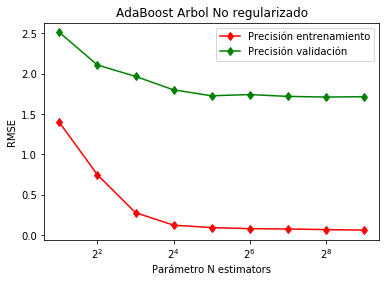

In [10]:
from sklearn.ensemble import AdaBoostRegressor

bestRMSE = 100
bestParamN = 0
n_range = [2**i for i in range(1,10)]
trains_RMSE = list()
vals_RMSE = list()

for n_r in n_range:
  model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=n_r)
  model.fit(X_train,y_train)
  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  trainRMSE = RMSE(y_train,y_train_hat)
  valRMSE = RMSE(y_val,y_val_hat)
  if valRMSE < bestRMSE:
    bestParamN = n_r
  trains_RMSE.append(trainRMSE)
  vals_RMSE.append(valRMSE)

print("Best n param= ",bestParamN)
model_ada_unr = AdaBoostRegressor(base_estimator=Tree(), n_estimators=bestParamN)
model_ada_unr.fit(X_train,y_train)
y_train_hat = model_ada_unr.predict(X_train)
y_val_hat = model_ada_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt
plt.plot(n_range, trains_RMSE, 'rd-', label="Precisión entrenamiento")
plt.plot(n_range, vals_RMSE, 'gd-', label="Precisión validación")
plt.legend(loc='best')
plt.xlabel("Parámetro N estimators")
plt.ylabel("RMSE")
plt.xscale('log',basex=2)
plt.title("AdaBoost Arbol No regularizado")

Best n param=  512
RMSE train=  0.7474277604246866
RMSE val=  1.739231379005884


Text(0.5, 1.0, 'AdaBoost Arbol No regularizado')

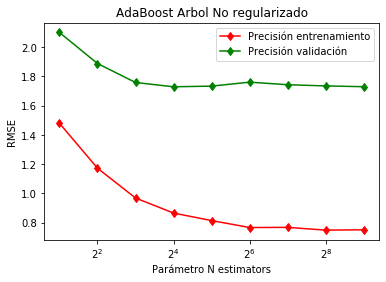

In [11]:
from sklearn.ensemble import AdaBoostRegressor

bestRMSE = 100
bestParamN = 0
n_range = [2**i for i in range(1,10)]
trains_RMSE = list()
vals_RMSE = list()

for n_r in n_range:
  model = AdaBoostRegressor(base_estimator=Tree(max_depth=50, min_samples_split=20), n_estimators=n_r)
  model.fit(X_train,y_train)
  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  trainRMSE = RMSE(y_train,y_train_hat)
  valRMSE = RMSE(y_val,y_val_hat)
  if valRMSE < bestRMSE:
    bestParamN = n_r
  trains_RMSE.append(trainRMSE)
  vals_RMSE.append(valRMSE)

print("Best n param= ",bestParamN)
model_ada_reg = AdaBoostRegressor(base_estimator=Tree(max_depth=50, min_samples_split=20), n_estimators=bestParamN)
model_ada_reg.fit(X_train,y_train)
y_train_hat = model_ada_reg.predict(X_train)
y_val_hat = model_ada_reg.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt
plt.plot(n_range, trains_RMSE, 'rd-', label="Precisión entrenamiento")
plt.plot(n_range, vals_RMSE, 'gd-', label="Precisión validación")
plt.legend(loc='best')
plt.xlabel("Parámetro N estimators")
plt.ylabel("RMSE")
plt.xscale('log',basex=2)
plt.title("AdaBoost Arbol No regularizado")

Igual que en Bagging, el RMSE sigue mejorando al aumentar la cantidad de arboles de desición utilizados en el ensamblado.

Según la documentación de sklearn AdaBoostRegressor, los pesos de las instancias son ajustados según el error de la predicción actual. Así, los siguientes regresores se enfocan mas en los casos difíciles.

Utilizando AdaBoost en un árbol de múltiples niveles no regularizado, se obtiene un modelo con poco overfitting. Se observa que baja significativamente el error del conjunto de train, hasta un 0.0674. Pero aun así no presenta overfitting dado que el RMSE para el conjunto de validación es de 1.7090, muy similar que los resultados de Bagging.

Para el caso de árboles regularizados, el RMSE en entrenamiento y validación es de 0.7512 y 1.7425 respectivamente. Acá empeora un poco el modelo en comparación al No regularizado.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

Best n param=  512
RMSE train=  0.6464338451710157
RMSE val=  1.670014405330963


Text(0.5, 1.0, 'RandomForest No regularizado')

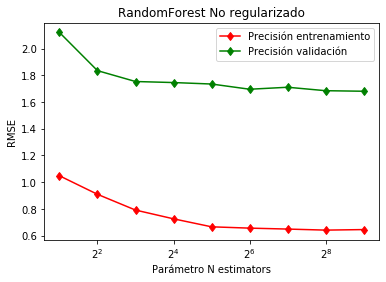

In [12]:
from sklearn.ensemble import RandomForestRegressor

bestRMSE = 100
bestParamN = 0
n_range = [2**i for i in range(1,10)]
trains_RMSE = list()
vals_RMSE = list()

for n_r in n_range:
  model = RandomForestRegressor(n_estimators=n_r, n_jobs=-1)
  model.fit(X_train,y_train)
  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  trainRMSE = RMSE(y_train,y_train_hat)
  valRMSE = RMSE(y_val,y_val_hat)
  if valRMSE < bestRMSE:
    bestParamN = n_r
  trains_RMSE.append(trainRMSE)
  vals_RMSE.append(valRMSE)

print("Best n param= ",bestParamN)
model_forest_unr = RandomForestRegressor(n_estimators=bestParamN, n_jobs=-1, oob_score=True)
model_forest_unr.fit(X_train,y_train)
y_train_hat = model_forest_unr.predict(X_train)
y_val_hat = model_forest_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt
plt.plot(n_range, trains_RMSE, 'rd-', label="Precisión entrenamiento")
plt.plot(n_range, vals_RMSE, 'gd-', label="Precisión validación")
plt.legend(loc='best')
plt.xlabel("Parámetro N estimators")
plt.ylabel("RMSE")
plt.xscale('log',basex=2)
plt.title("RandomForest No regularizado")

Best n param=  512
RMSE train=  1.2328970368281678
RMSE val=  1.6047778427045567


Text(0.5, 1.0, 'RandomForest regularizado')

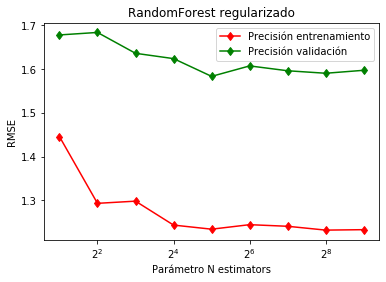

In [13]:
from sklearn.ensemble import RandomForestRegressor

bestRMSE = 100
bestParamN = 0
n_range = [2**i for i in range(1,10)]
trains_RMSE = list()
vals_RMSE = list()

for n_r in n_range:
  model = RandomForestRegressor(max_depth = 200, min_samples_split = 20, n_estimators=n_r, n_jobs=-1)
  model.fit(X_train,y_train)
  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  trainRMSE = RMSE(y_train,y_train_hat)
  valRMSE = RMSE(y_val,y_val_hat)
  if valRMSE < bestRMSE:
    bestParamN = n_r
  trains_RMSE.append(trainRMSE)
  vals_RMSE.append(valRMSE)

print("Best n param= ",bestParamN)
model_forest_reg = RandomForestRegressor(max_depth = 200, min_samples_split = 20, n_estimators=bestParamN, n_jobs=-1, oob_score=True)
model_forest_reg.fit(X_train,y_train)
y_train_hat = model_forest_reg.predict(X_train)
y_val_hat = model_forest_reg.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt
plt.plot(n_range, trains_RMSE, 'rd-', label="Precisión entrenamiento")
plt.plot(n_range, vals_RMSE, 'gd-', label="Precisión validación")
plt.legend(loc='best')
plt.xlabel("Parámetro N estimators")
plt.ylabel("RMSE")
plt.xscale('log',basex=2)
plt.title("RandomForest regularizado")

Utilizando RandomForest en un árbol de múltiples niveles no regularizado, se obtiene un modelo con poco overfitting. El error obtenido para el conjunto de entrenamiento es 0.6458, el cual es mayor que los casos anteriores. Por otra parte, el error del conjunto de validación es 1.6761. Ambos errores son similares a los obtenidos con la técnica de Bagging. Este mejor valor se obtuvo con n_est = 512. 

Para el caso de árboles regularizados, se obtiene el error del conjunto de entrenamiento que es 1.2335 y en el conjunto de validación 1.5939. Para el conjunto de entrenamiento se obtuvo un error más grande, en comparación con la técnica de Bagging. Para el conjunto de validación, se redujo en el error obtenido, en comparación con Bagging.

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).

In [14]:
print("Bagging:")
oob_error = model_bagging_unr.oob_score_
val_error = model_bagging_unr.score(X_val,y_val)
print("OOB error bagging unr: ",oob_error)
print ("Val error bagging unr: ",val_error)

oob_error = model_bagging_reg.oob_score_
val_error = model_bagging_reg.score(X_val,y_val)
print("OOB error bagging reg: ",oob_error)
print ("Val error bagging reg: ",val_error)

print("Forest:")
oob_error = model_forest_unr.oob_score_
val_error = model_forest_unr.score(X_val,y_val)
print("OOB error forest unr: ",oob_error)
print ("Val error forest unr: ",val_error)

oob_error = model_forest_reg.oob_score_
val_error = model_forest_reg.score(X_val,y_val)
print("OOB error forest reg: ",oob_error)
print ("Val error forest reg: ",val_error)

Bagging:
OOB error bagging unr:  0.9449848267083922
Val error bagging unr:  0.9438863204423161
OOB error bagging reg:  0.945353799925614
Val error bagging reg:  0.9439895683324926
Forest:
OOB error forest unr:  0.9446918610173264
Val error forest unr:  0.9444441894460425
OOB error forest reg:  0.9472232807552867
Val error forest reg:  0.9486998195941976


Para todos los casos son muy similares los valores de las metricas OOB error y el error calculado sobre el conjunto de validación. Por lo tanto OOB si puede ser una métrica de generalización alternativa.

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos. 

> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

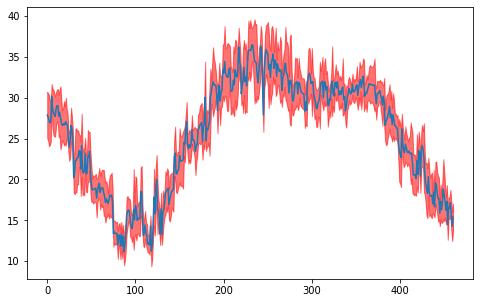

In [16]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

In [17]:
df = pd.read_csv("DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
df['season_fall'] = 0
df['season_rainy'] = 0

y = df.pop("y_value").values
X = df.values

selected_model = RandomForestRegressor(max_depth = 200, min_samples_split = 20, n_estimators=512, n_jobs=-1, oob_score=True)
selected_model.fit(X_train_complete, y_train_complete)
predicted_y = model_forest_reg.predict(X)

print("RMSE final = ",RMSE(y, predicted_y))
oob_error = selected_model.oob_score_
val_error = selected_model.score(X, y)
print("OOB error forest reg: ",oob_error)
print ("Val error forest reg: ",val_error)

RMSE final =  1.692079149343445
OOB error forest reg:  0.9481076895086518
Val error forest reg:  0.9285429691427814


Luego de toda la experimentación, se llegó a que el mejor modelo fue Random Forest con el Árbol regularizado usando 512 árboles de decisión en el ensamblado. Evaluando sobre el dataset de test, arrojó un RMSE de 1.7. Esto quiere decir que el modelo en promedio se equivoca 1.7 grados centigrados en comparación al valor real. Parece ser un valor decente, dado que las temperaturas varían entre 10 a 30 grados quiere decir que apenas se equivoca en una valor cercano al 10% de la temperatura real.
Durante la experimentación principalmente se utilizaron diversos modelos del tipo árbol de regresión, y afinando parametros y distintas técnicas se llegó al mejor modelo posible. Se trabajó poco con algún procesamiento previo de los datos, lo cual podría mejorar los resultados.

<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).
```python
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')
```

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:
```python
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)
```

* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Matias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv("Train_data.csv") 
df = df[['id','tweet_content','harassment']]
df.rename(columns={ "tweet_content": "Text",'harassment':'Acoso'},inplace=True)

dfTest = pd.read_csv("Test_input.csv") 
dfTest = dfTest[['id','tweet_content']]
dfTest.rename(columns={ "tweet_content": "Text"},inplace=True)


df_train_text = df.Text
labels_train = df.Acoso.values

df_test_text = dfTest.Text

from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.01, random_state=0)

import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    return wordlemmatizer.lemmatize(porter.stem(word))
    
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    text = re.sub(r'[1-9]','',text)
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
features_train = tfidf_model.transform(texts_train)
features_val = tfidf_model.transform(texts_val)

features_test = tfidf_model.transform(texts_test)

vocab = tfidf_model.get_feature_names()
dist=np.array(features_train.sum(axis=0)).reshape(-1,)

print("Largo diccionario entrenamiento: ", len(vocab))
masFrecuentesEntrenamiento = dist.argsort()[-15:][::-1]  # obtiene las 15 palabras mas utilizadas, en orden de frecuencia de mayor a menor
for indice in masFrecuentesEntrenamiento:
    print(vocab[indice],dist[indice])

Largo diccionario entrenamiento:  12916
amp 172.0292801701148
co 147.03063390968464
ava 122.66280789163099
rt 114.41517685552927
girl 91.45410478585542
fuck 86.63401877558734
thi 83.16903253830971
slut 72.48976061341547
like 72.00356482145125
sassi 71.8714626374829
bitch 62.52417835850281
get 51.1480387150112
wa 51.039470626430635
love 49.524372643005066
go 48.04605308592649


In [21]:
!pip install -U imbalanced-learn

Best accuracy test =  0.8620689655172413
Best param test =  0.001


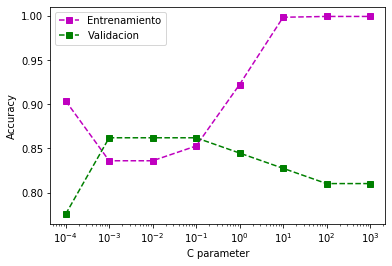

In [22]:
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(C=param, penalty ="l2", class_weight = "balanced")
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4.0,4.0)]

y_train_acc = np.empty(len(Cs))
y_test_acc = np.empty(len(Cs))
bestAcc = 0
bestParam = 0

us = NearMiss(n_neighbors = 3 , version = 2)
features_train, labels_train = us.fit_sample(features_train,labels_train)

for i in range(len(Cs)):
    _, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= Cs[i])

    y_train_acc[i] = train_acc
    y_test_acc[i] = test_acc

    if test_acc > bestAcc:
      bestAcc = test_acc
      bestParam = Cs[i]

print("Best accuracy test = ", bestAcc)
print("Best param test = ", bestParam)
plt.plot(Cs,y_train_acc,'s--m',label ="Entrenamiento")
plt.plot(Cs,y_test_acc,'s--g',label ="Validacion")
plt.legend(loc='best')
plt.xlabel("C parameter")
plt.ylabel("Accuracy")
plt.xscale('log')



In [23]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 0.001)
print(f"Precision Training: {train_acc}")
print(f"Precision Validacion: {test_acc}")

Precision Training: 0.8361111111111111
Precision Validacion: 0.8620689655172413


In [24]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_val, labels_val )

# classes_weights = {0: 1, 1: 5} #or choose..
# model.set_params(class_weight=classes_weights)
# model.fit(features_train, labels_train)
# score_the_model(model, features_val, labels_val )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.98      0.86      0.91        49
           +       0.53      0.89      0.67         9

    accuracy                           0.86        58
   macro avg       0.76      0.87      0.79        58
weighted avg       0.91      0.86      0.87        58



In [25]:
test_pred = model.predict(features_test) #or ".predict"
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+test_pred.shape[0])
df_aux["harassment"] = test_pred.astype('int')
df_aux.to_csv("test_estimation5.csv", index=False)

In [26]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
# model_bagging_unr = BaggingRegressor(base_estimator=Tree(), n_estimators=500, n_jobs=-1, oob_score=True)
# model_bagging_unr.fit(features_train, labels_train)

def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    # model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc


# os =  RandomOverSampler()
# X_train_res, y_train_res = os.fit_sample(features_train,labels_train)

us = NearMiss(n_neighbors = 3 , version = 2)
features_train, labels_train = us.fit_sample(features_train,labels_train)

model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val)

In [27]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_val, labels_val )


Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.98      0.82      0.89        49
           +       0.47      0.89      0.62         9

    accuracy                           0.83        58
   macro avg       0.72      0.85      0.75        58
weighted avg       0.90      0.83      0.85        58



In [28]:
test_pred = model.predict(features_test) #or ".predict"
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+test_pred.shape[0])
df_aux["harassment"] = test_pred.astype('int')
df_aux.to_csv("test_estimation8.csv", index=False)

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18  
[5] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html